# Comparison of Biosynthetic Gene Clusters (BGCs) in Streptomyces coelicolor A3(2)


#### The test task

In some of our projects, we rely on genome mining software that, given a genome sequence, can find regions of interest responsible for the production of bioactive compounds. These regions of interest are often referred to as **biosynthetic gene clusters (BGCs)**, but we can think of them simply as pairs of start and end coordinates in a long string corresponding to the genome. 

The task would be to write a simple script that compares the outputs of two different genome mining tools for the same genome. 

The tools would be [antiSMASH](https://antismash.secondarymetabolites.org/#!/about) (the state-of-the-art method) and [GECCO](https://gecco.embl.de/) (an experimental machine learning-based approach). The genome will be Streptomyces coelicolor A3(2); its sequence is attached in compressed FASTA format. 

So we upload the FASTA file here. We can read this file in Python using the **Biopython** library, which provides tools for handling FASTA files efficiently. 

<div class="alert alert-block alert-info">
<b>How to Install:</b> 
To use Biopython in Python, we can install it with pip

`$ pip install biopython`

</div>

We add all the libraries that we need:

In [2]:
import pandas as pd
from Bio import SeqIO
import requests
import json

/Users/Erfan/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
# path to the FASTA file
file_path = "/Users/Erfan/Downloads/Test_Task_HiWi/NC_003888.3.fna"

# Read the file using Biopython
for record in SeqIO.parse(file_path, "fasta"):
    print(f"ID: {record.id}")
    print(f"Description: {record.description}")
    print(f"Sequence: {record.seq[:100]}...")  # Print only the first 100 bases for checking
    print(f"Length: {len(record.seq)}")


ID: NC_003888.3
Description: NC_003888.3 Streptomyces coelicolor A3(2) chromosome, complete genome
Sequence: CCCGCGGAGCGGGTACCACATCGCTGCGCGATGTGCGAGCGAACACCCGGGCTGCGCCCGGGTGTTGCGCTCCCGCTCCGCGGGAGCGCTGGCGGGACGC...
Length: 8667507


### The antiSMASH output

The antiSMASH output for this genome is already available [here](https://antismash.secondarymetabolites.org/upload/example/index.html) (you can explore it via their GUI, but for the scripting, please press Download --> Download JSON results file).

So we download this link and save it as 'data.json' file in the same directory:


In [47]:
url = 'https://antismash.secondarymetabolites.org/upload/example/NC_003888.3.json'
response = requests.get(url)
if response.status_code == 200:
    with open('data.json', 'w') as f:
        f.write(response.text)


### The GECCO output

For GECCO, you must install the tool and run it on the attached file yourself (use all default parameters).

<div class="alert alert-block alert-info">
<b>How to Install:</b> 

GECCO is implemented in Python, and supports all versions from Python 3.6. Install GECCO with pip:

`$ pip install gecco-tool`

</div>

Run a prediction on a FASTA file named NC_003888.3.fna and output the predictions to the current directory:

In [ ]:
!gecco run --genome /Users/Erfan/Downloads/Test_Task_HiWi/NC_003888.3.fna 

✔ Loading sequences ━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MiB    100% 0:00:00 0:00:00
✔ Loading sequences ━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MiB    100% 0:00:00 0:00:00
✔ Loading sequences ━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MiB    100% 0:00:00 0:00:00
✔ Loading sequences ━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MiB    100% 0:00:00 0:00:00
✔ Loading sequences ━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MiB    100% 0:00:00 0:00:00
✔ Loading sequences ━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MiB    100% 0:00:00 0:00:00
✔ Loading sequences ━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MiB    100% 0:00:00 0:00:00
✔ Loading sequences ━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MiB    100% 0:00:00 0:00:00
✔ Loading sequences ━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MiB    100% 0:00:00 0:00:00
✔ Loading sequences ━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MiB    100% 0:00:00 0:00:00
✔ Loading sequences ━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MiB    100% 0:00:00 0:00:00
✔ Loading sequences ━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MiB    100% 0:00:00 0:00:00
✔ Loading sequences ━━━━━━━━

GECCO should generate you a sample tab-separated file {sequence}.clusters.tsv with coordinates for all found BGCs (regions of interest).

### Extracting the Region From AntiSMASH Output

AntiSMASH output format is more complicated. The output JSON is a giant dictionary, but you need only a tiny fraction of this data. In the 'records' field, there is a list of results for each input genome, and since we have only one genome as input, this list contains just one record. Inside, you will find a long list of 'features' identified by antiSMASH, you need only the ones having 'type' equal to 'region' -- that is our regions of interest. Each of them has coordinates in the 'location' field in a format like '[86636:139654]'; you will need to parse them.

In [5]:

# Load the antiSMASH output JSON file
with open('/Users/Erfan/Downloads/Test_Task_HiWi/BGC/data.json') as f:
    data = json.load(f)

# Access the first (and only) record in the 'records' field
record = data['records'][0]

# Initialize an empty list to store regions of interest
regions_of_interest_antiSMASH = []

# Iterate through 'features' in the record
for feature in record['features']:
    # Check if the 'type' of the feature is 'region'
    if feature.get('type') == 'region':
        # Extract the 'location' field
        location = feature.get('location')
        
        # Parse the location to extract start and end coordinates
        if location and location.startswith('[') and location.endswith(']'):
            start, end = map(int, location[1:-1].split(':'))
            regions_of_interest_antiSMASH.append({
                'start': start,
                'end': end
            })

# Display the extracted regions
for region in regions_of_interest_antiSMASH:
    print(f"Region from {region['start']} to {region['end']}")


Region from 86636 to 139654
Region from 166500 to 192038
Region from 246525 to 271084
Region from 493988 to 552325
Region from 791583 to 801799
Region from 1257624 to 1298749
Region from 1995499 to 2005898
Region from 2939305 to 2949875
Region from 3024894 to 3054682
Region from 3523334 to 3603988
Region from 5494800 to 5567424
Region from 5671015 to 5692101
Region from 5751944 to 5824487
Region from 6326586 to 6356533
Region from 6429548 to 6476442
Region from 6632342 to 6643659
Region from 6656218 to 6678399
Region from 6833314 to 6864522
Region from 6880897 to 6956537
Region from 7088263 to 7142447
Region from 7409663 to 7432456
Region from 7506016 to 7532758
Region from 7570411 to 7618555
Region from 7682906 to 7709360
Region from 7973469 to 8047475
Region from 8269636 to 8290764
Region from 8475101 to 8549581


### Extracting the Region From GECCO Output

In [6]:
# Load the GECCO output tsv file
reader = pd.read_csv('NC_003888.3.clusters.tsv', delimiter='\t')

reader.head(5)

,sequence_id,cluster_id,start,end,average_p,max_p,type,alkaloid_probability,nrp_probability,polyketide_probability,ripp_probability,saccharide_probability,terpene_probability,proteins,domains
0,NC_003888.3,NC_003888.3_cluster_1,1144,42174,0.955674,0.999175,Unknown,0.056906,0.193690,0.212401,0.216538,0.06,0.092709,NC_003888.3_10;NC_003888.3_11;NC_003888.3_12;N...,PF00201;PF00665;PF00881;PF01047;PF01590;PF0169...
1,NC_003888.3,NC_003888.3_cluster_2,98463,128290,0.963851,0.999986,Polyketide,0.010000,0.190000,0.850000,0.020000,0.00,0.030000,NC_003888.3_100;NC_003888.3_101;NC_003888.3_10...,PF00005;PF00106;PF00109;PF00109;PF00109;PF0019...
2,NC_003888.3,NC_003888.3_cluster_3,168705,189886,0.945490,0.999977,Terpene,0.030000,0.100000,0.190000,0.010000,0.03,0.590000,NC_003888.3_148;NC_003888.3_149;NC_003888.3_15...,PF00107;PF00348;PF00355;PF00494;PF00582;PF0058...
3,NC_003888.3,NC_003888.3_cluster_4,250805,267513,0.936970,0.998160,RiPP,0.002010,0.142577,0.093226,0.641250,0.00,0.026305,NC_003888.3_226;NC_003888.3_227;NC_003888.3_22...,PF00126;PF00528;PF00528;PF00561;PF00975;PF0104...
4,NC_003888.3,NC_003888.3_cluster_5,494260,544087,0.970834,0.999982,NRP,0.020000,0.690000,0.160000,0.100000,0.05,0.030000,NC_003888.3_435;NC_003888.3_436;NC_003888.3_43...,PF00005;PF00005;PF00005;PF00005;PF00148;PF0027...


In [7]:
# List to store regions of interest
regions_of_interest_GECCO = []

for index, row in reader.iterrows():
    region = {
        'start': row['start'],
        'end': row['end'],
    }
    regions_of_interest_GECCO.append(region)

# Display the extracted regions
for region in regions_of_interest_GECCO:
    print(f"Region from {region['start']} to {region['end']}")


Region from 1144 to 42174
Region from 98463 to 128290
Region from 168705 to 189886
Region from 250805 to 267513
Region from 494260 to 544087
Region from 738595 to 745763
Region from 1126535 to 1134012
Region from 1151870 to 1170556
Region from 1275235 to 1282540
Region from 1333824 to 1368913
Region from 1998468 to 2009392
Region from 2609897 to 2639559
Region from 2934114 to 2953604
Region from 3027514 to 3043370
Region from 3122937 to 3144042
Region from 3513024 to 3604107
Region from 3880083 to 3885819
Region from 4001665 to 4028773
Region from 4242512 to 4258428
Region from 4615154 to 4635156
Region from 4895198 to 4899117
Region from 5511271 to 5536287
Region from 5681016 to 5684465
Region from 5776630 to 5797479
Region from 6339501 to 6343258
Region from 6428862 to 6470874
Region from 6541507 to 6551406
Region from 6553552 to 6563778
Region from 6831346 to 6878175
Region from 6889594 to 6949758
Region from 6991755 to 7012171
Region from 7106284 to 7132084
Region from 7170144 to 7

### Compare the Coordinates Reported by Both Tools

For following processing we change the data structure of regions:

In [51]:
# Convert to list of tuples
gecco_regions = [(region['start'], region['end']) for region in regions_of_interest_GECCO]

# Convert to list of tuples
antismash_regions = [(region['start'], region['end']) for region in regions_of_interest_antiSMASH]

In [22]:
# Function to check if two regions intersect
def regions_intersect(region1, region2):
    start1, end1 = region1
    start2, end2 = region2
    return max(start1, start2) <= min(end1, end2)

# Count unique and intersecting regions
unique_gecco = 0
unique_antismash = 0
intersecting_regions = 0

# Check for intersections
for gecco_region in gecco_regions:
    found_intersection = False
    for antismash_region in antismash_regions:
        if regions_intersect(gecco_region, antismash_region):
            intersecting_regions += 1
            found_intersection = True
            break
    if not found_intersection:
        unique_gecco += 1

# Count antiSMASH regions that do not intersect with any GECCO regions
for antismash_region in antismash_regions:
    found_intersection = False
    for gecco_region in gecco_regions:
        if regions_intersect(antismash_region, gecco_region):
            found_intersection = True
            break
    if not found_intersection:
        unique_antismash += 1

# Report the results
print(f"Unique Regions found only by GECCO: {unique_gecco}")
print(f"Unique Regions found only by antiSMASH: {unique_antismash}")
print(f"Regions intersecting between GECCO and antiSMASH: {intersecting_regions}")


Unique Regions found only by GECCO: 22
Unique Regions found only by antiSMASH: 3
Regions intersecting between GECCO and antiSMASH: 24


### Visualize the Comparison

We will use a dynamic genomic coordinate plot to visualize the regions detected by each tool, and a Venn diagram to show the overlap count.


In [56]:
import plotly.graph_objects as go

# Prepare data for the GECCO and antiSMASH regions
gecco_x = [(start, end) for start, end in gecco_regions]
antisMash_x = [(start, end) for start, end in antismash_regions]

# Create Plotly figure
fig = go.Figure()

# Add GECCO regions
for i, (start, end) in enumerate(gecco_x):
    fig.add_trace(go.Scatter(
        x=[start, end], y=[0.55, 0.55],
        mode='lines',
        line=dict(color='blue', width=20),
        name="GECCO" if i == 0 else None,  # Set legend name only for the first item
        showlegend=i == 0,  # Show legend only for the first item
        # name="GECCO",
        hoverinfo="text",
        text=f"GECCO Region: {start}-{end}"
    ))

# Add antiSMASH regions
for i, (start, end) in enumerate(antisMash_x):
    fig.add_trace(go.Scatter(
        x=[start, end], y=[0.5, 0.5],
        mode='lines',
        line=dict(color='green', width=20),
        name="antiSMASH" if i == 0 else None,  # Set legend name only for the first item
        showlegend=i == 0,   # Show legend only for the first item
        # name="antiSMASH",
        hoverinfo="text",
        text=f"antiSMASH Region: {start}-{end}"
    ))

# Customize layout
fig.update_layout(
    title="Comparison of BGC Regions Identified by GECCO and antiSMASH",
    xaxis_title="Genomic Coordinates",
    showlegend=True,
    yaxis=dict(
        showticklabels=False,  # Hide y-axis labels
    ),
)

# Display interactive plot
fig.show()


<div class="alert alert-block alert-info">
<b>How to Install:</b> 
To use matplotlib-venn in Python, we can install it with pip

`$ pip install matplotlib-venn`

</div>

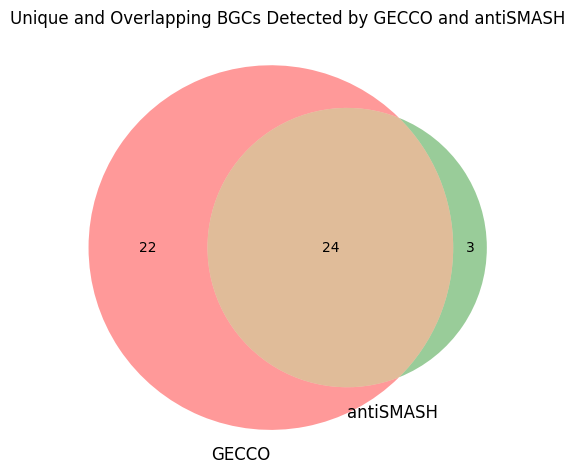

In [46]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2


# Venn Diagram
plt.figure(figsize=(6, 6))
venn = venn2(subsets=(unique_gecco, unique_antismash, intersecting_regions), set_labels=('GECCO', 'antiSMASH'))
plt.title("Unique and Overlapping BGCs Detected by GECCO and antiSMASH")
plt.show()


### Conclusions and Insights

GECCO identified a larger number of unique regions (22 regions) compared to antiSMASH, which only identified 3 unique regions. This suggests that GECCO may be more sensitive or have a broader detection range, potentially identifying regions that antiSMASH misses.
The higher sensitivity of GECCO could be due to its machine-learning-based approach, which may detect weaker signals or patterns that the more traditional antiSMASH method overlooks.

In conclusion, GECCO appears to complement antiSMASH by detecting additional regions, with the possibility of including more false positives. The significant overlap in intersecting regions suggests both tools are capturing a core set of important BGCs, providing confidence in the reliability of these findings. This analysis supports the value of multi-tool approaches in genome mining for bioactive compound discovery.